In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
#일단 k21 데이터만 가지고 왔음
k21 = pd.read_excel("klips21p.xlsx")

In [4]:
k6 = pd.read_excel("klips06p.xlsx")

In [5]:
#pid와 세후소득 데이터를 갖고 옴
sample = k21.loc[:,['pid','p211703']]
sample_6 = k6.loc[:,['pid','p061703']]

In [6]:
sample_6

,pid,p061703
0,101,780.0
1,102,1800.0
2,201,500.0
3,202,600.0
4,203,NaN
...,...,...
11536,612803,765.0
11537,613002,1800.0
11538,613102,1100.0
11539,613602,NaN


In [46]:
#pid의 데이터 타입을 string으로 변경. 원래 float
sample['pid'] = sample['pid'].astype('str')

In [47]:
sample

,pid,p211703
0,102,3600.0
1,201,1550.0
2,202,1134.0
3,203,NaN
4,401,6000.0
...,...,...
14439,11024802,2160.0
14440,11025002,6000.0
14441,11025302,1800.0
14442,11027402,950.0


In [49]:
#index를 pid로 변경
sample = sample.set_index('pid')

In [69]:
#plot 할 때 NaN 값 때문에 plot이 안 돼서 일단 데이터 분포를 확인하기 위해
#결측치 제거하고 plot 시도
#여기서 NaN은 단순히 응답이 없는 것이지 0 이 아니므로 0으로 처리해서는 안됨
sample2 = sample
sample2 = sample2.dropna(axis=0)

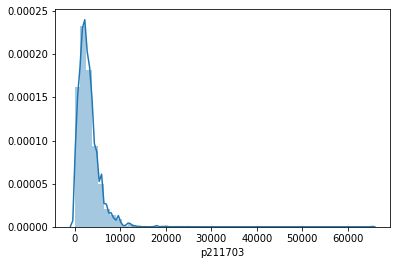

In [70]:
#1억 이상 버는 부자들이 꽤 많음

sns.distplot(sample2['p211703'])

In [71]:
sample2.loc[(sample2.p211703 >= 12000),'p211703']=12000

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [72]:
sample2

,p211703
pid,
102,3600.0
201,1550.0
202,1134.0
401,6000.0
402,960.0
...,...
11024802,2160.0
11025002,6000.0
11025302,1800.0


In [105]:
bin_list = []
for i in range(11):
    bin_list.append(i*1000)
bin_list

[0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]

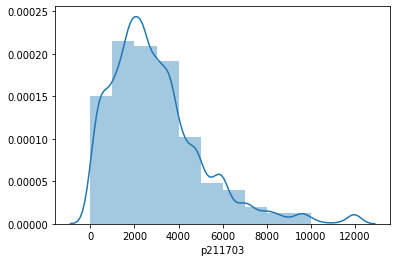

In [85]:
#1000단위로 빈도를 표시해봄, 1억 이상은 bin_list에 없어서 표시 안 됨
sns.distplot(sample2['p211703'],bins=bin_list)

In [86]:
np.digitize(sample2['p211703'],bin_list)

array([4, 2, 2, ..., 2, 1, 2], dtype=int64)

In [87]:
sample2['label'] = np.digitize(sample2['p211703'],bin_list)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [90]:
sample2

,p211703,label
pid,,
102,3600.0,4
201,1550.0,2
202,1134.0,2
401,6000.0,7
402,960.0,1
...,...,...
11024802,2160.0,3
11025002,6000.0,7
11025302,1800.0,2


In [91]:
#필요하다면 label의 데이터 형을 변환해야함
sample2.dtypes

p211703    float64
label        int64
dtype: object

In [92]:
#결측치를 제거 하지 않은 sample에 함수 적용
sample['label'] = np.digitize(sample['p211703'],bin_list)

In [93]:
#세후소득 NaN의 label이 11로 표시 
#label 11은 1억 이상인 사람들이 돼야하는데 응답 안한 사람들도 11로 처리됨
sample

,p211703,label
pid,,
102,3600.0,4
201,1550.0,2
202,1134.0,2
203,NaN,11
401,6000.0,7
...,...,...
11024802,2160.0,3
11025002,6000.0,7
11025302,1800.0,2


In [131]:
#sample의 세후소득이 NaN인 경우 label을 0으로 변경
sample.loc[(sample['p211703'].isnull()),'label']=0

In [132]:
sample[sample['p211703'].isnull()]

,p211703,label
pid,,
203,NaN,0
403,NaN,0
603,NaN,0
903,NaN,0
1402,NaN,0
...,...,...
11015702,NaN,0
11018102,NaN,0
11019102,NaN,0
